# Imports

In [1]:
%cd ..

/Users/sophiayeremeeva/Desktop/uni/ukma/thesis/diploma/code/NeuroKG


/Users/sophiayeremeeva/Desktop/uni/ukma/thesis/diploma/code/NeuroKG/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from database.cypher_queries import query
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Number of Nodes and Edges

In [3]:
count_nodes = query('count_nodes')[0]['count_nodes']

In [4]:
print(f'Total number of the nodes in the knowledge base is {count_nodes}.')

Total number of the nodes in the knowledge base is 1443.


In [5]:
edges = query('count_edges')[0]['count_edges']

In [6]:
print(f'Total number of the edges in the knowledge base is {edges}.')

Total number of the edges in the knowledge base is 1164.


In [7]:
isolated_nodes = query('isolated_nodes')[0]['isolated_nodes']

In [8]:
print(f'Total number of the isolated_nodes in the knowledge base is {isolated_nodes}.')

Total number of the isolated_nodes in the knowledge base is 647.


#### Distribution of node degree

In [9]:
degree_nodes = query('degree_nodes')

In [10]:
distribution = []
for node in degree_nodes:
    distribution.append(node['degree'])

In [45]:
fig = px.histogram(x=distribution)
fig.update_traces(marker_color='skyblue')
fig.update_layout(
    title='Distribution of Node Degree',
    xaxis=dict(title='Nodes'),
    yaxis=dict(title='Number of Edges'),
    height=400,
    width=600, 
    plot_bgcolor='whitesmoke'
)
fig.update_xaxes(minor=dict(ticklen=6, tickcolor="blue", showgrid=False))
fig.show()

#### Diameter

In [12]:
diameter = query('diameter')[0]['diameter']

In [13]:
print(f'The diameter of the knowledge base is {diameter} edges.')

The diameter of the knowledge base is 19 edges.


### PageRank

In [14]:
# query('create_full_graph')

In [15]:
pagerank = query('pagerank')

In [55]:
names = [item['name'] for item in pagerank[:25]]
scores = [item['score'] for item in pagerank[:25]]

fig = go.Figure([go.Bar(x=names, y=scores, marker_color='skyblue')])

fig.update_layout(
    title='Pagerank of the Nodes',
    xaxis=dict(title='Nodes', tickangle=-45),
    yaxis=dict(title='Scores'),
    height=600,
    width=800, 
    plot_bgcolor='whitesmoke',
    font={'size':12, 'family':'Times New Roman', 'color':'black'}
)

fig.show()

### Adjacency Matrix

In [17]:
nodes_names = query('nodes_names')

In [18]:
nodes_names_list = [node['node_id'] for node in nodes_names]

In [19]:
matrix = query('adjacency_matrix')

In [20]:
adjacency_matrix = [[0] * len(nodes_names_list) for _ in range(len(nodes_names_list))]

In [21]:
for i, node1 in enumerate(nodes_names_list):
    for elem in matrix:
        if elem['node1_id'] == node1:
            for j, node2 in enumerate(nodes_names_list):
                if elem['node2_id'] == node2:
                    node1_index = nodes_names_list.index(elem['node1_id'])
                    node2_index = nodes_names_list.index(elem['node2_id'])
                    adjacency_matrix[node1_index][node2_index] = 1
                    adjacency_matrix[node2_index][node1_index] = 1
                    # adjacency_matrix[i][j] = 1
                    # adjacency_matrix[j][i] = 1

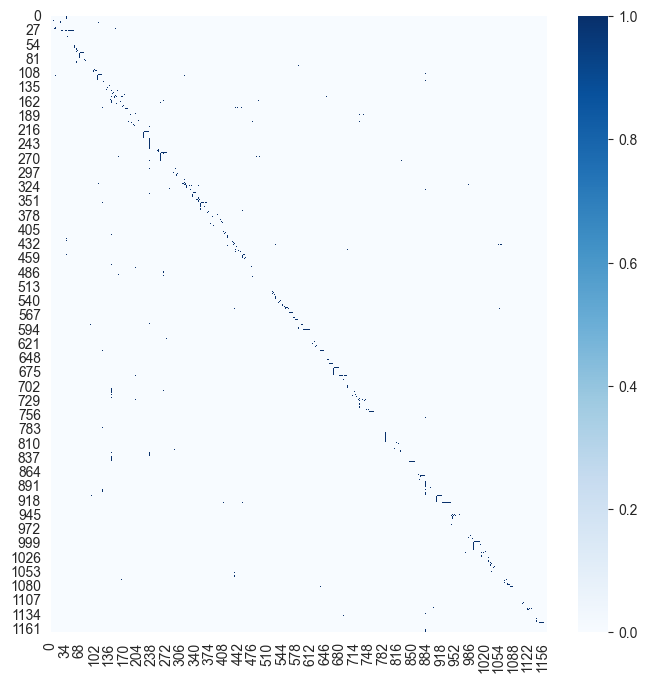

In [27]:
plt.figure(figsize=(8, 8)) 
ax = sns.heatmap(adjacency_matrix, cmap='Blues', vmin=0, vmax=1)
plt.show()

додати найбільші лейбли, вивести назви нод для кожного